# Analytics of ML Features Usage in IDEs



## 1. Import Required Libraries and Load Data

**Name:** Wassim Mezgahnni   
**Country of Residence:**  Germany

**Goal:** Analyze user activity (March–May 2025) for interactions with LLM models, features and license types in JetBrains IDEs. Produce EDA, charts, statistical tests, aggregated metrics and actionable recommendations.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
file_path = "/Users/wassim/Analytics-of-ML-Features-Usage-in-IDEs/da_internship_task_dataset.csv"
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

df.head(10)

Dataset loaded successfully!
Shape: (122746, 7)


,uuid,day_id,license,model,feature,requests_cnt,spent_amount
0,user_920,2025-05-01,Premium,Model_A,Feature_1,44.0,16.38
1,user_717,2025-03-04,Premium,Model_B,Feature_2,72.0,27.92
2,user_610,2025-05-08,Premium,Model_A,Feature_2,27.0,9.87
3,user_94,2025-03-11,Basic,Model_D,Feature_1,76.0,14.67
4,user_920,2025-05-14,Premium,Model_E,Feature_3,47.0,9.88
5,user_97,2025-05-14,Basic,Model_A,Feature_1,10.0,3.01
6,user_338,2025-04-19,Basic,Model_A,Feature_3,13.0,5.29
7,user_433,2025-05-28,Enterprise,Model_E,Feature_1,81.0,14.19
8,user_81,2025-03-19,Standard,Model_E,Feature_3,59.0,12.92
9,user_311,2025-03-07,Standard,Model_D,Feature_1,56.0,12.12


## 2. Initial Data Exploration and Cleaning
- the structure
- data types
- Quality of the dataset

In [16]:
# Dataset information
print("DATASET INFORMATION")

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names and Data Types:")
display(df.dtypes)

# Check for missing values
print(f"\nMissing Values in Each Column:")
display(df.isna().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# --- Data Preparation ---
# Convert 'day_id' to datetime
df['day_id'] = pd.to_datetime(df['day_id'])

#  data quality checks
display(df[['requests_cnt','spent_amount']].describe())

print("--- Unique Values ---")
print(f"Total unique users: {df['uuid'].nunique()}")
print(f"Date range: {df['day_id'].min().date()} to {df['day_id'].max().date()}")
print(f"License types: {df['license'].unique()}")
print(f"Model types: {df['model'].unique()}")
print(f"Feature types: {df['feature'].unique()}")

# Save the processed data for subsequent steps
df.to_csv("processed_da_dataset.csv", index=False)




DATASET INFORMATION

Dataset Shape: 122746 rows × 7 columns

Column Names and Data Types:


uuid                    object
day_id          datetime64[ns]
license                 object
model                   object
feature                 object
requests_cnt           float64
spent_amount           float64
dtype: object


Missing Values in Each Column:


uuid            0
day_id          0
license         0
model           0
feature         0
requests_cnt    0
spent_amount    0
dtype: int64


Duplicate rows: 0


,requests_cnt,spent_amount
count,122746.000000,122746.000000
mean,51.260742,12.227798
std,167.977380,37.588494
min,1.000000,0.270000
25%,18.000000,5.140000
50%,32.000000,8.020000
75%,54.000000,13.060000
max,12900.000000,2599.000000


--- Unique Values ---
Total unique users: 1866
Date range: 2025-03-01 to 2025-05-31
License types: ['Premium' 'Basic' 'Enterprise' 'Standard']
Model types: ['Model_A' 'Model_B' 'Model_D' 'Model_E' 'Model_C']
Feature types: ['Feature_1' 'Feature_2' 'Feature_3' 'Feature_5' 'Feature_4']


## 3. High-Level Trends (Time Series Analysis)

Aggregation of the data by day and week to observe overall trends in user requests and spending.

Saved 'daily_total_requests.png'
Saved 'daily_total_spending.png'
Saved 'weekly_total_requests.png'
Saved 'weekly_total_spending.png'

--- Time Series Analysis Summary ---
Total Requests (3 months): 6,292,051
Total Spent (3 months): 1,500,913
Peak Requests: 121,083 on 2025-05-07


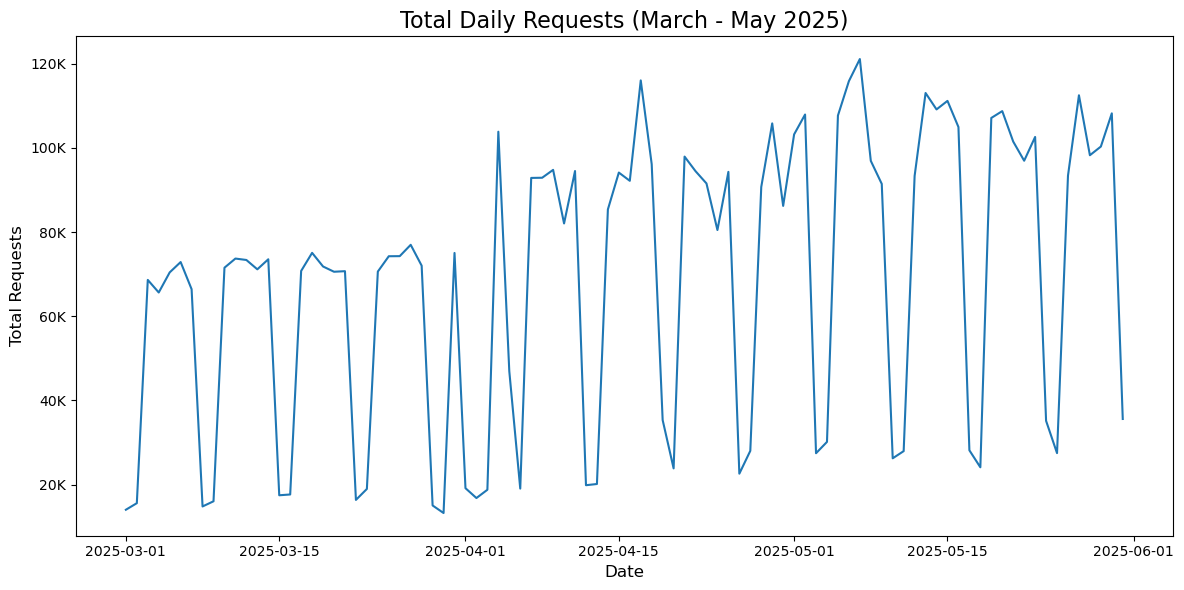

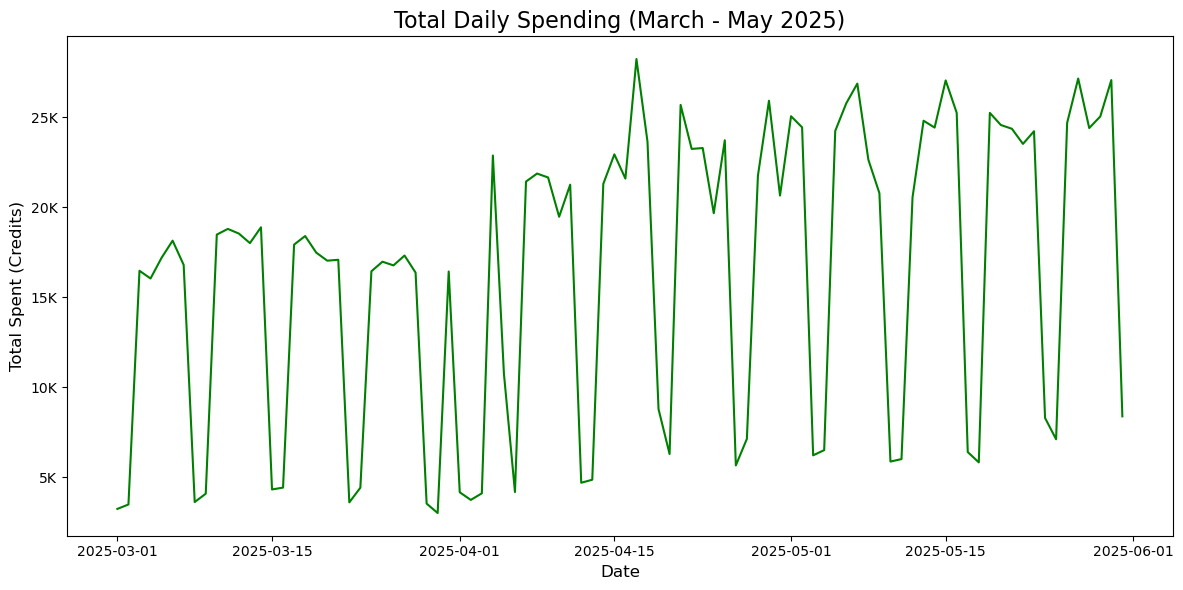

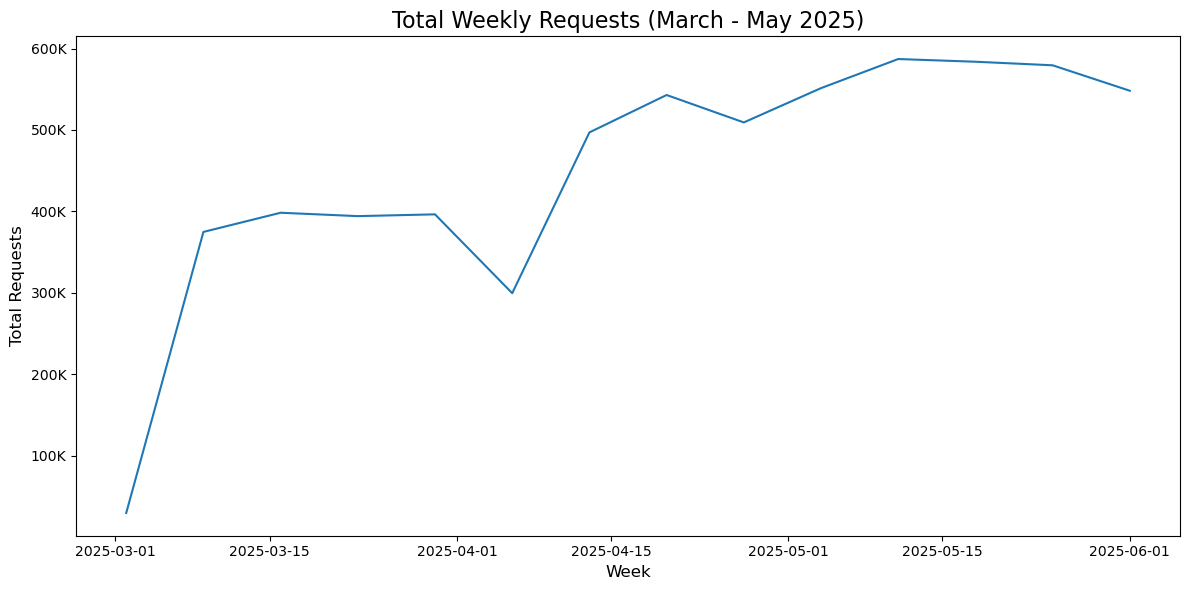

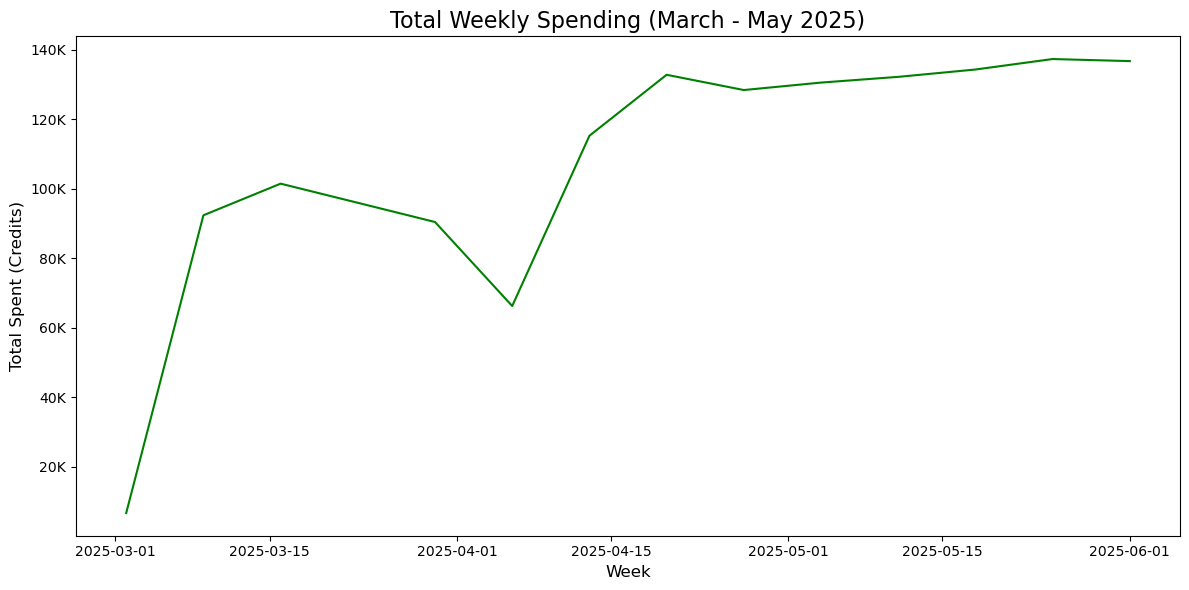

In [19]:
import matplotlib.ticker as ticker

df = pd.read_csv("processed_da_dataset.csv", parse_dates=['day_id'])

# --- Daily Aggregation ---
daily_agg = df.groupby('day_id').agg(
    total_requests=('requests_cnt', 'sum'),
    total_spent=('spent_amount', 'sum')
).reset_index()

# Function to format large numbers for plot axes
def format_yaxis_large_numbers(y, pos):
    if y >= 1_000_000:
        return f'{y*1e-6:1.1f}M'
    if y >= 1_000:
        return f'{y*1e-3:1.0f}K'
    return y
formatter = ticker.FuncFormatter(format_yaxis_large_numbers)

#  Daily Total Requests
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=daily_agg, x='day_id', y='total_requests')
ax1.set_title('Total Daily Requests (March - May 2025)', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Requests', fontsize=12)
ax1.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('daily_total_requests.png')
print("Saved 'daily_total_requests.png'")

# Daily Total Spending
plt.figure(figsize=(12, 6))
ax2 = sns.lineplot(data=daily_agg, x='day_id', y='total_spent', color='green')
ax2.set_title('Total Daily Spending (March - May 2025)', fontsize=16)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Total Spent (Credits)', fontsize=12)
ax2.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('daily_total_spending.png')
print("Saved 'daily_total_spending.png'")

# --- Weekly Aggregation ---
df_weekly = df.set_index('day_id')
weekly_agg = df_weekly.resample('W').agg(
    total_requests=('requests_cnt', 'sum'),
    total_spent=('spent_amount', 'sum')
).reset_index()

# Weekly Total Requests
plt.figure(figsize=(12, 6))
ax3 = sns.lineplot(data=weekly_agg, x='day_id', y='total_requests')
ax3.set_title('Total Weekly Requests (March - May 2025)', fontsize=16)
ax3.set_xlabel('Week', fontsize=12)
ax3.set_ylabel('Total Requests', fontsize=12)
ax3.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('weekly_total_requests.png')
print("Saved 'weekly_total_requests.png'")

# Weekly Total Spending
plt.figure(figsize=(12, 6))
ax4 = sns.lineplot(data=weekly_agg, x='day_id', y='total_spent', color='green')
ax4.set_title('Total Weekly Spending (March - May 2025)', fontsize=16)
ax4.set_xlabel('Week', fontsize=12)
ax4.set_ylabel('Total Spent (Credits)', fontsize=12)
ax4.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('weekly_total_spending.png')
print("Saved 'weekly_total_spending.png'")

print("\n--- Time Series Analysis Summary ---")
print(f"Total Requests (3 months): {daily_agg['total_requests'].sum():,.0f}")
print(f"Total Spent (3 months): {daily_agg['total_spent'].sum():,.0f}")
peak_requests_day = daily_agg.loc[daily_agg['total_requests'].idxmax()]
print(f"Peak Requests: {peak_requests_day['total_requests']:,.0f} on {peak_requests_day['day_id'].date()}")

**Insights:** Overall usage (requests and spending) shows a steady trend with some weekly cyclicality (dips on weekends ) and a few notable spikes in activity can be seen particularly in late April and early May.

## 4. Categorical Analysis (License, Model, Feature)


--- 1. Analysis by License Type ---
Aggregated data by License:
      license  total_requests  total_spent  total_users
1  Enterprise       1925374.0    473237.77          251
2     Premium       1719628.0    403971.50          247
3    Standard       1568926.0    367450.21          708
0       Basic       1078123.0    256253.86          717
Saved 'license_total_requests.png'
Saved 'license_total_spending.png'

--- 2. Analysis by Model Type ---
Aggregated data by Model:
     model  total_requests  total_spent
2  Model_C       1941796.0    366621.74
3  Model_D       1894150.0    361607.23
0  Model_A        991933.0    365077.08
4  Model_E        733801.0    139441.21
1  Model_B        730371.0    268166.08
Saved 'model_total_requests.png'
Saved 'model_total_spending.png'

--- 3. Analysis by Feature Type ---
Aggregated data by Feature:
     feature  total_requests  total_spent
0  Feature_1       2669779.0    610509.16
1  Feature_2       1756475.0    432843.51
2  Feature_3       1135679.

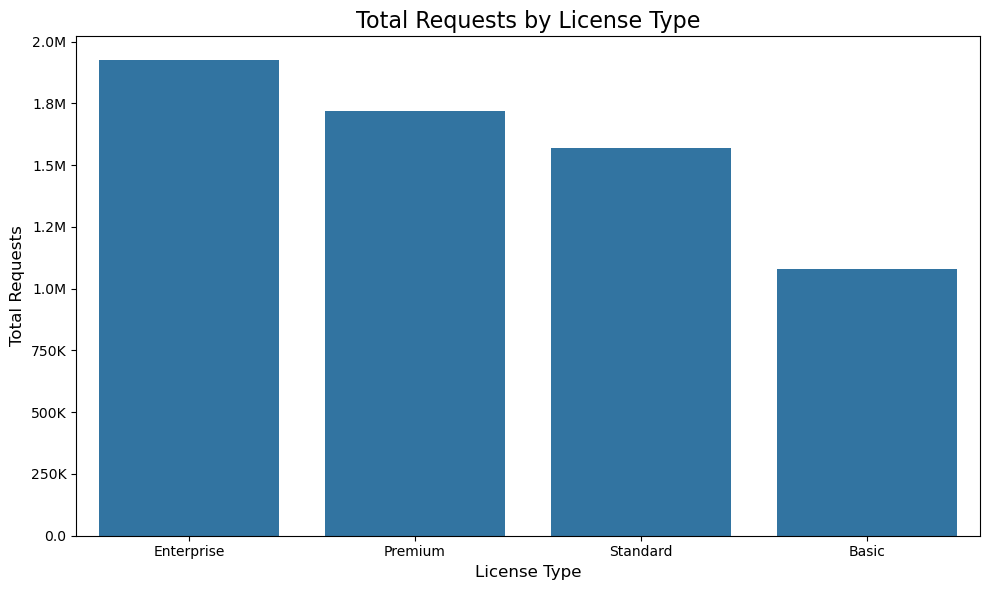

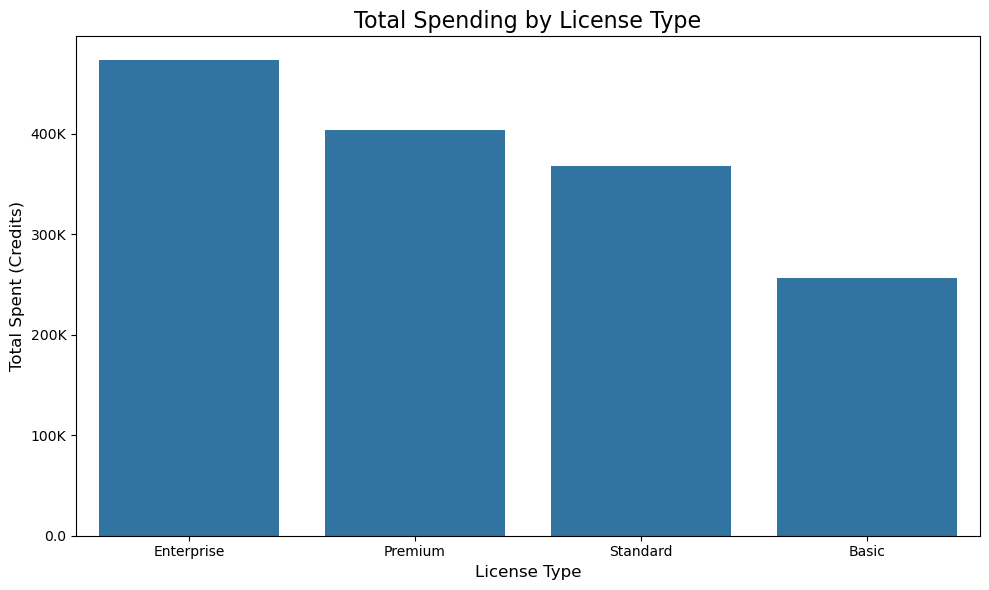

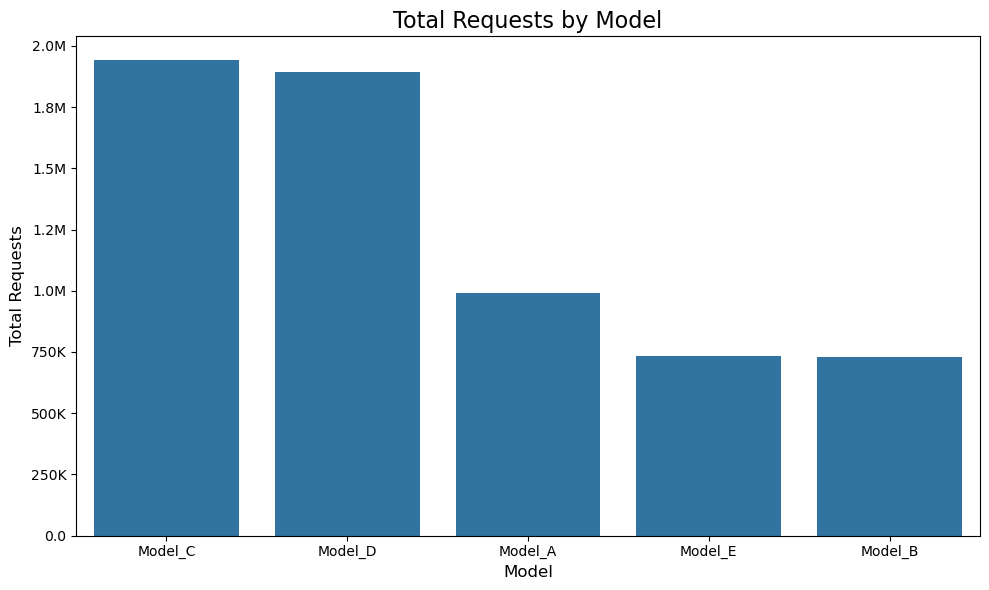

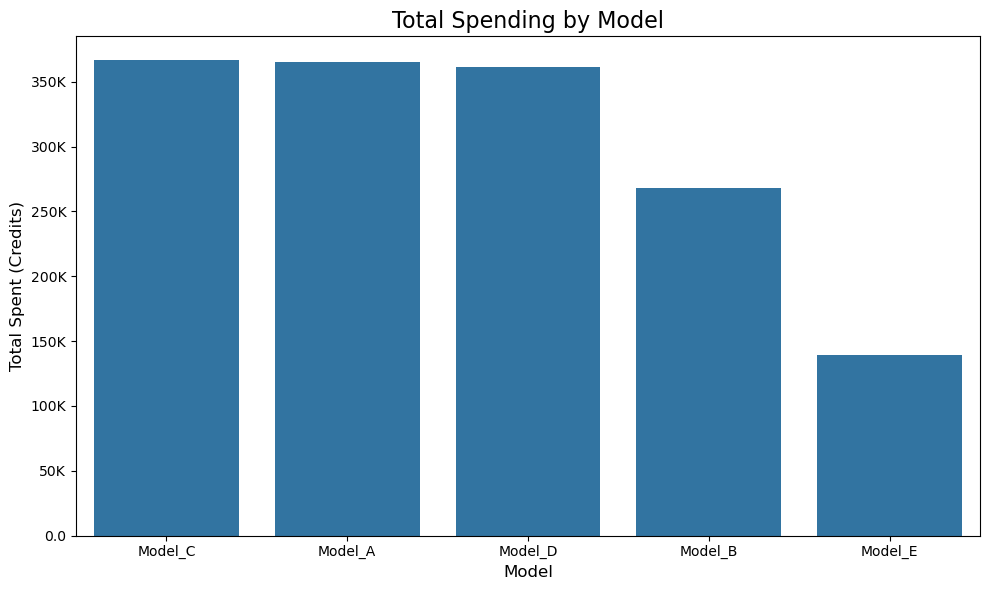

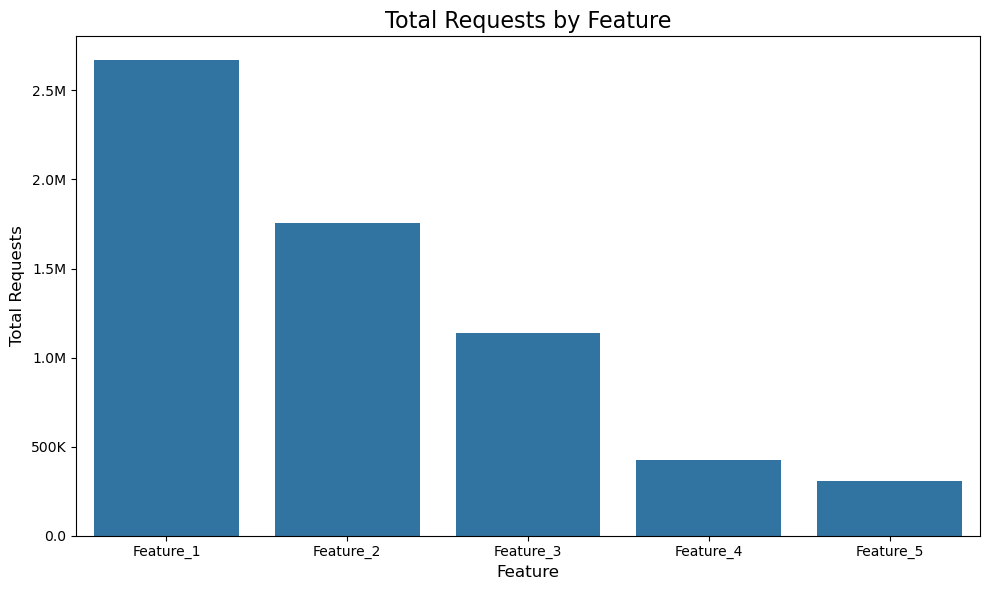

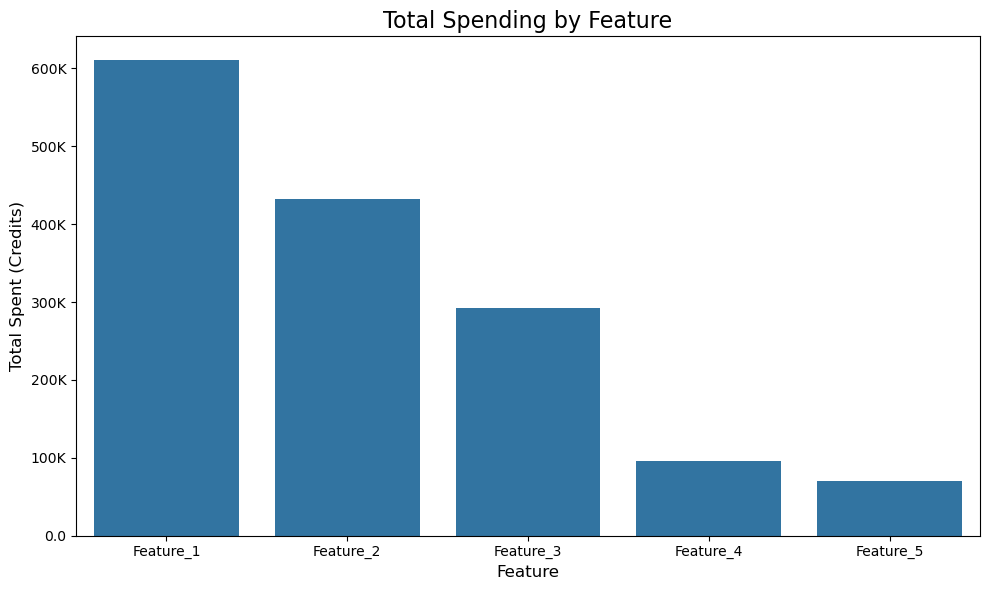

In [20]:
df = pd.read_csv("processed_da_dataset.csv", parse_dates=['day_id'])

# --- 1. Analysis by License ---
print("\n--- 1. Analysis by License Type ---")
license_agg = df.groupby('license').agg(
    total_requests=('requests_cnt', 'sum'),
    total_spent=('spent_amount', 'sum'),
    total_users=('uuid', 'nunique')
).reset_index().sort_values('total_requests', ascending=False)
print("Aggregated data by License:")
print(license_agg)

# Total Requests by License
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=license_agg, x='license', y='total_requests')
ax1.set_title('Total Requests by License Type', fontsize=16)
ax1.set_xlabel('License Type', fontsize=12)
ax1.set_ylabel('Total Requests', fontsize=12)
ax1.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('license_total_requests.png')
print("Saved 'license_total_requests.png'")

# Total Spending by License
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=license_agg.sort_values('total_spent', ascending=False), x='license', y='total_spent')
ax2.set_title('Total Spending by License Type', fontsize=16)
ax2.set_xlabel('License Type', fontsize=12)
ax2.set_ylabel('Total Spent (Credits)', fontsize=12)
ax2.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('license_total_spending.png')
print("Saved 'license_total_spending.png'")


# --- 2. Analysis by Model ---
print("\n--- 2. Analysis by Model Type ---")
model_agg = df.groupby('model').agg(
    total_requests=('requests_cnt', 'sum'),
    total_spent=('spent_amount', 'sum')
).reset_index().sort_values('total_requests', ascending=False)
print("Aggregated data by Model:")
print(model_agg)

# Total Requests by Model
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(data=model_agg, x='model', y='total_requests')
ax3.set_title('Total Requests by Model', fontsize=16)
ax3.set_xlabel('Model', fontsize=12)
ax3.set_ylabel('Total Requests', fontsize=12)
ax3.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('model_total_requests.png')
print("Saved 'model_total_requests.png'")

# Total Spending by Model
plt.figure(figsize=(10, 6))
ax4 = sns.barplot(data=model_agg.sort_values('total_spent', ascending=False), x='model', y='total_spent')
ax4.set_title('Total Spending by Model', fontsize=16)
ax4.set_xlabel('Model', fontsize=12)
ax4.set_ylabel('Total Spent (Credits)', fontsize=12)
ax4.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('model_total_spending.png')
print("Saved 'model_total_spending.png'")


# --- 3. Analysis by Feature ---
print("\n--- 3. Analysis by Feature Type ---")
feature_agg = df.groupby('feature').agg(
    total_requests=('requests_cnt', 'sum'),
    total_spent=('spent_amount', 'sum')
).reset_index().sort_values('total_requests', ascending=False)
print("Aggregated data by Feature:")
print(feature_agg)

# Total Requests by Feature
plt.figure(figsize=(10, 6))
ax5 = sns.barplot(data=feature_agg, x='feature', y='total_requests')
ax5.set_title('Total Requests by Feature', fontsize=16)
ax5.set_xlabel('Feature', fontsize=12)
ax5.set_ylabel('Total Requests', fontsize=12)
ax5.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('feature_total_requests.png')
print("Saved 'feature_total_requests.png'")

#  Total Spending by Feature
plt.figure(figsize=(10, 6))
ax6 = sns.barplot(data=feature_agg.sort_values('total_spent', ascending=False), x='feature', y='total_spent')
ax6.set_title('Total Spending by Feature', fontsize=16)
ax6.set_xlabel('Feature', fontsize=12)
ax6.set_ylabel('Total Spent (Credits)', fontsize=12)
ax6.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('feature_total_spending.png')
print("Saved 'feature_total_spending.png'")

**Insights:**

- License: Enterprise and Premium users are the most engaged they drive the highest requests and spending. Basic and Standard have more unique users but each user is less active on average.

- Model: Model_C and Model_D are the most popular (highest requests). 
However, Model_A generates almost as much spending as the top models despite having only half the requests. This suggests it is more expensive.

- Feature: Feature_1 is the clear winner, dominating both usage and spending. Feature_2 is a strong second.

## 5. Investigating Relationships

- Explores the connections between the categories. We will focus on cost-per-request and usage patterns.


--- 1. Cost Analysis ---

Average Cost per Request by Model:
     model  cost_per_request
0  Model_A          0.369166
1  Model_B          0.366373
3  Model_D          0.192177
4  Model_E          0.190301
2  Model_C          0.189598
Saved 'model_avg_cost_per_request.png'

Average Cost per Request by Feature:
     feature  cost_per_request
2  Feature_3          0.282840
4  Feature_5          0.282122
1  Feature_2          0.280180
3  Feature_4          0.276937
0  Feature_1          0.275974
Saved 'feature_avg_cost_per_request.png'

--- 2. Activity vs. Spending ---
Saved 'requests_vs_spending_scatter_log.png'
Log-log scatter plot shows distinct clusters, likely representing the different model costs.

--- 3. Usage Heatmaps ---

Pivot Table: Total Requests (Model vs. Feature)
feature  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
model                                                         
Model_A   363290.0   295124.0   231346.0    69566.0    32607.0
Model_B   241452.0   25

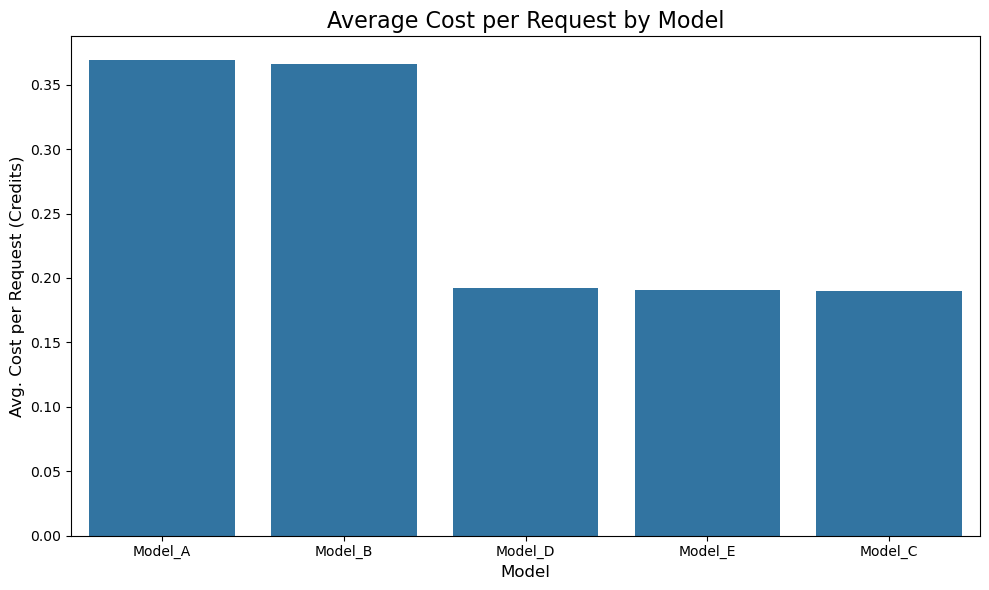

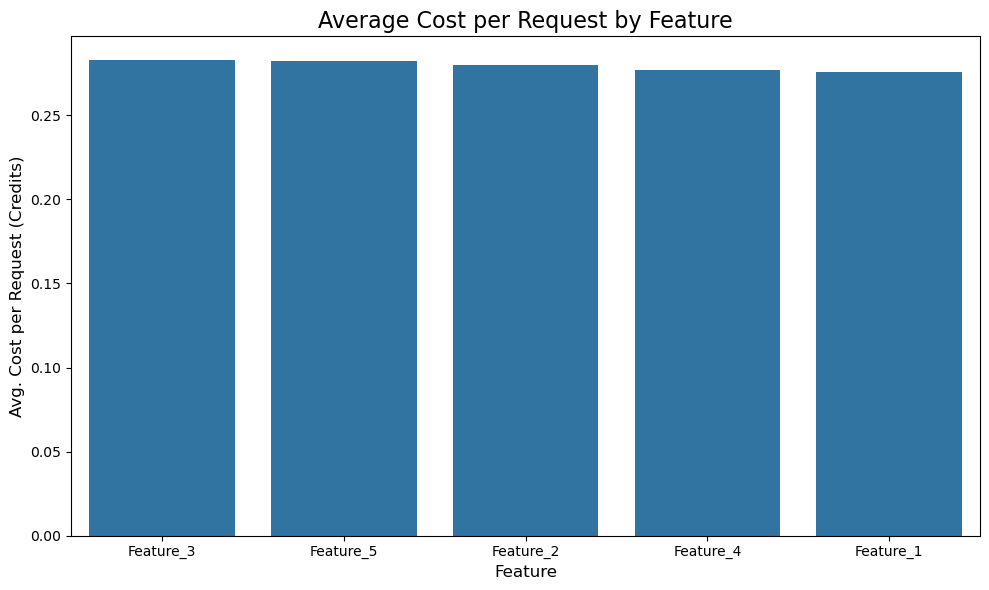

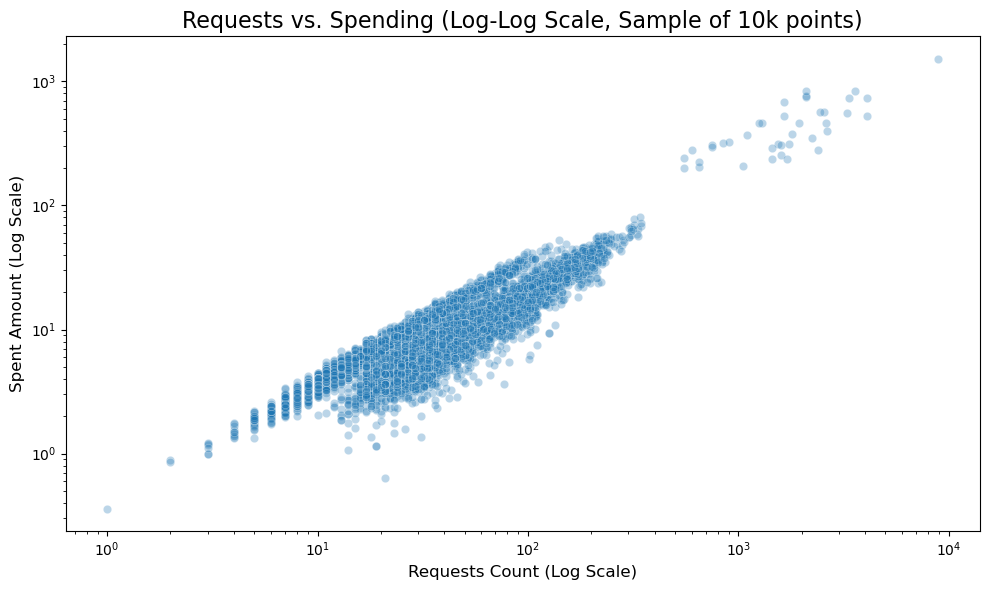

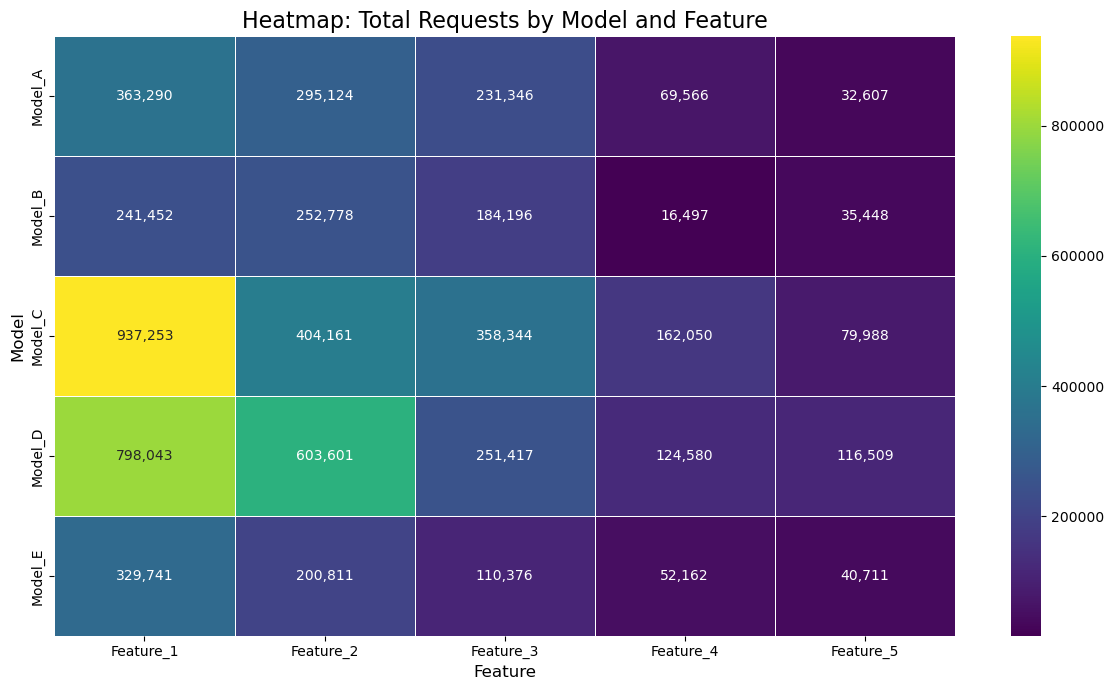

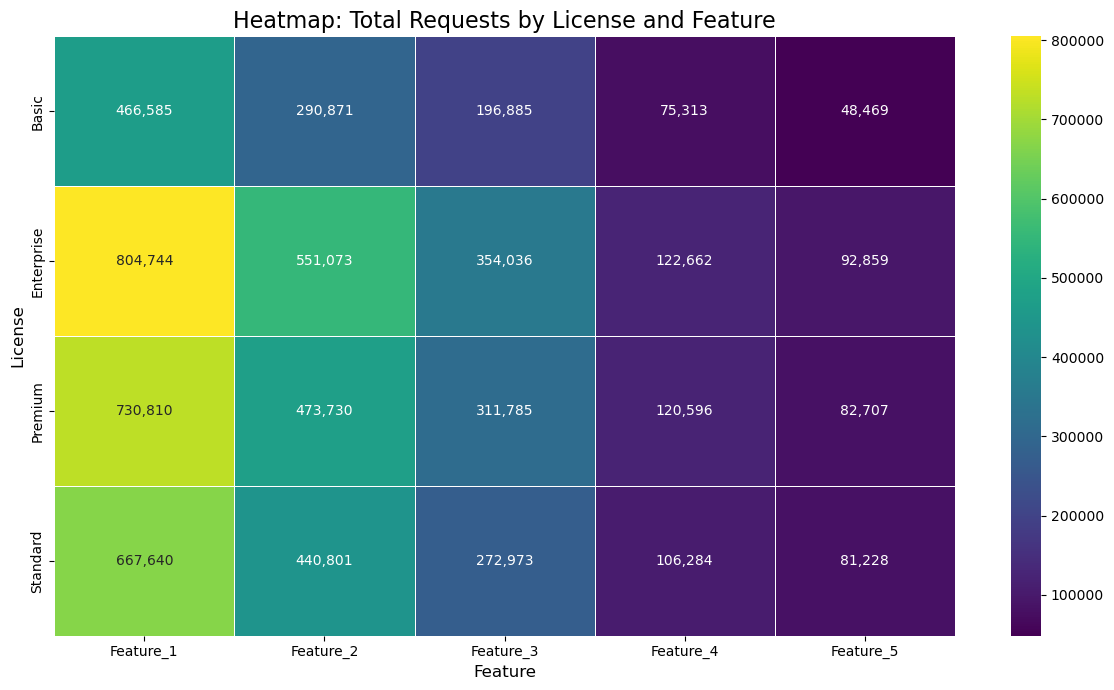

In [21]:
df = pd.read_csv("processed_da_dataset.csv", parse_dates=['day_id'])

# --- 1. Cost Analysis (Cost per Request) ---
print("\n--- 1. Cost Analysis ---")
df['cost_per_request'] = df['spent_amount'] / df['requests_cnt']

# Average cost by Model
avg_cost_model = df.groupby('model')['cost_per_request'].mean().reset_index().sort_values('cost_per_request', ascending=False)
print("\nAverage Cost per Request by Model:")
print(avg_cost_model)

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=avg_cost_model, x='model', y='cost_per_request')
ax1.set_title('Average Cost per Request by Model', fontsize=16)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Avg. Cost per Request (Credits)', fontsize=12)
plt.tight_layout()
plt.savefig('model_avg_cost_per_request.png')
print("Saved 'model_avg_cost_per_request.png'")

# Average cost by Feature
avg_cost_feature = df.groupby('feature')['cost_per_request'].mean().reset_index().sort_values('cost_per_request', ascending=False)
print("\nAverage Cost per Request by Feature:")
print(avg_cost_feature)

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=avg_cost_feature, x='feature', y='cost_per_request')
ax2.set_title('Average Cost per Request by Feature', fontsize=16)
ax2.set_xlabel('Feature', fontsize=12)
ax2.set_ylabel('Avg. Cost per Request (Credits)', fontsize=12)
plt.tight_layout()
plt.savefig('feature_avg_cost_per_request.png')
print("Saved 'feature_avg_cost_per_request.png'")

# --- 2. Activity vs. Spending (Scatter Plot) ---
print("\n--- 2. Activity vs. Spending ---")
# Sample 10,000 points to avoid the overplotting
df_sample = df.sample(n=10000, random_state=1)

# Scatter Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='requests_cnt', y='spent_amount', alpha=0.3)
plt.title('Requests vs. Spending (Log-Log Scale, Sample of 10k points)', fontsize=16)
plt.xlabel('Requests Count (Log Scale)', fontsize=12)
plt.ylabel('Spent Amount (Log Scale)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('requests_vs_spending_scatter_log.png')
print("Saved 'requests_vs_spending_scatter_log.png'")
print("Log-log scatter plot shows distinct clusters, likely representing the different model costs.")

# --- 3. Usage Heatmaps (Interaction Effects) ---
print("\n--- 3. Usage Heatmaps ---")

# heatmap: Model vs. Feature (Total Requests)
model_feature_pivot = df.pivot_table(index='model', columns='feature', values='requests_cnt', aggfunc='sum', fill_value=0)
print("\nPivot Table: Total Requests (Model vs. Feature)")
print(model_feature_pivot)

plt.figure(figsize=(12, 7))
sns.heatmap(model_feature_pivot, annot=True, fmt=',.0f', cmap='viridis', linewidths=.5)
plt.title('Heatmap: Total Requests by Model and Feature', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_model_vs_feature_requests.png')
print("Saved 'heatmap_model_vs_feature_requests.png'")

# Heatmap: License vs. Feature (Total Requests)
license_feature_pivot = df.pivot_table(index='license', columns='feature', values='requests_cnt', aggfunc='sum', fill_value=0)
print("\nPivot Table: Total Requests (License vs. Feature)")
print(license_feature_pivot)

plt.figure(figsize=(12, 7))
sns.heatmap(license_feature_pivot, annot=True, fmt=',.0f', cmap='viridis', linewidths=.5)
plt.title('Heatmap: Total Requests by License and Feature', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('License', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_license_vs_feature_requests.png')
print("Saved 'heatmap_license_vs_feature_requests.png'")

**Insights:**
- **Cost Drivers :**
- The cost per request is determined almost entirely by the model, not the feature. 
- Model_A and Model_B are nearly twice as expensive ($0.37$/request) as Model_C, Model_D, and Model_E (all ~$0.19$/request).
- **Usage Patterns:**
- The most popular features (Feature_1, Feature_2) are most often used with the cheaper models (Model_C, Model_D). Which is a healthy pattern.
- Feature usage is remarkably consistent across all license types. All user segments (Basic to Enterprise) prefer the features in the same order: F1 > F2 > F3 > F4 > F5. The main difference is volume.

## 6. Key Findings and Recommendations

---
## Remarks :
### 1. **Revenue & Usage Drivers:**
- "Enterprise" and "Premium " license holders are the most valuable user segments, driving the majority of requests and spending despite having fewer unique users than Basic or Standard tiers.

### 2. **The important Feature 1:**
- Feature_1 is the cornerstone of the product, accounting for 42% of all requests and 41% of all spending. 
- Its popularity is across all license types and it's heavily used with the most cost-effective models (C and D).

### 3. **The "Premium" Models:**
- Model_A and Model_B are "premium" or "expensive" models, costing nearly double per request compared to other models. 
- Their usage is less frequent, but they contribute significantly to revenue (example :  Model_A is 3rd in spending but 4th in requests).

### 4. **Cost-Effective Models:**
- Model_C and Model_D are the most popular models and also the most cost-effective. 
- They power the most-used features, which is an efficient setup.

### 5. **Usage is Feature-Driven, Cost is Model-Driven:**
- User behavior is defined by the feature they choose. 
- The cost of that action is defined by the model that services the feature. 
- The cost per request is virtually identical across all features(it suggests that users don't pay "per feature")

---

## Recommendations

### **1. Protect and Optimize Feature_1**
-Given its critical importance, Feature_1 should receive the highest priority for maintenance, optimization, and quality assurance. Any downtime or degradation in this feature would have an outsized negative impact on usage and revenue.

### **2. Investigate Model_A and Model_B Value**
- Why are Model_A and Model_B so expensive? 
- Do they provide higher accuracy, speed or capabilities for specific tasks ( Feature_3 and Feature_2)?

**-> Action:** Conduct user surveys or A/B tests to see if users perceive a quality difference. If they do, this justifies the cost. If not, the team should aim to migrate users from these expensive models to cheaper ones (like C or D) to reduce operational costs without harming user experience.

### **3. Monetization Strategy**
- The usage pattern for Basic and Standard users is identical to Premium and Enterprise users, just at a lower volume.

**-> Action:** This provides a clear upsell path. Marketing can target active Basic/Standard users who frequently use Feature_1 and Feature_2 with offers to upgrade to Premium for higher rate limits, access to more advanced models, or other benefits.

### **4. Marketing and Growth**
- **Segment Targeting**: Develop targeted marketing campaigns for each user segment
- **Feature Promotion**: Increase awareness of underutilized high-value features
- **Model Education**: Create educational content about model capabilities and use cases

### **5. Promote Underutilized Features** : Feature_4 and Feature_5 are barely used.

**->Action:** The product team should investigate why are they hard to find? Do they solve a niche problem? Or are they simply not useful? 
- Based on this, either improve and promote them ( solution could be an in-IDE tutorials) or consider deprecating them to simplify the product.

### **6. Future Analysis**
- **Predictive Modeling**: Develop models to predict user churn and lifetime value
- **A/B Testing**: Test different pricing models and feature bundles
- **Cohort Analysis**: Track user cohorts over time to measure retention and growth
- **Sentiment Analysis**: Collect and analyze user feedback for each feature and model

---

## Priority Actions

### **Immediate (0 - 30 days)**
1. Identify and reach out to at-risk high-value users
2. Fix any issues with underperforming features
3. Optimize costs for high-spend models

### **Short-term (30 to 90 days)**
1. Launch targeted engagement campaigns for casual users
2. Develop and test new pricing models
3. Create educational content for underutilized features

### **Long-term (after 90 days)**
1. Build predictive analytics capabilities
2. Implement automated user segmentation
3. Develop personalized feature recommendations

---

## Metrics for success

Track these KPIs to measure improvement:
- **User Activation Rate**: % of new users becoming active within 30 days
- **Average Revenue Per User**: By segment and license type
- **Feature Adoption Rate**: % of users trying each feature
- **Cost Efficiency**: Cost-per-request trends over time
- **User Retention**: 30/60/90-day retention rates by segment